# Predicting Diabetes

## 1. Asking the right question 

the solution statment:
    <b>Use the Machine Learning Workflow to process and transformPima indian data to create a prediction model. This model must predict which people are likely to develop diabetes with 70% or grater accuracy</b>

## 2. Preparing the data

### Import Librarues

In [5]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt     # matplotlib.pyplot plots data
import numpy as np                   # numpy provides N-dim objects support

# do plotigng inline instead of in a separate window
%matplotlib inline

### Loading and review data

In [6]:
df = pd.read_csv("./data/pima-data.csv")  #load Pima data.

In [7]:
df.shape

(768, 10)

In [8]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [9]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


### Definition of features
From the metadata on the data source we have the following definition of the feature.

| Feature   | Description | Comments |
|---------------|--------------|---------|
|num_preg       | nubmber of pregnencies  |
| glucose_conc  | Plasma glucose concetration a 2 hours in an oral glucose tolerance test  |
| diastolic_bp  | Diasrolic blood pressure (mm Hg)  |
| thickness | Triceps skin fold thickness (mm)  |
| insulin   | 2-Hours serum insulin (mu U/ml)  |
| bmi  | Body mass index (weight in kg/(height in m)^2  |
| diab_prd  | Diabetes pedigree function  |
| Age (years) | Age (years) |
| skin  | ???? | what is this? |
| diabetes | Class variable (1=True, 0=False) | Why is our data boolean (True/False)


### Check for null values

In [15]:
df.isnull().values.any()

False

In [20]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
        
    Displays:
        matrix of correlation between columns. Blue-cyn-yello-red-dark red => less to more correlated
                                                0 --------------------> 1
                                                Expected a dark red line running from top left to bottom right
    """
    
    corr = df.corr()  # data fram correlation function
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)  # color code the rectangles by correlatin value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick mark
    plt.yticks(range(len(corr.columns)), corr.columns) # draw y tick mark

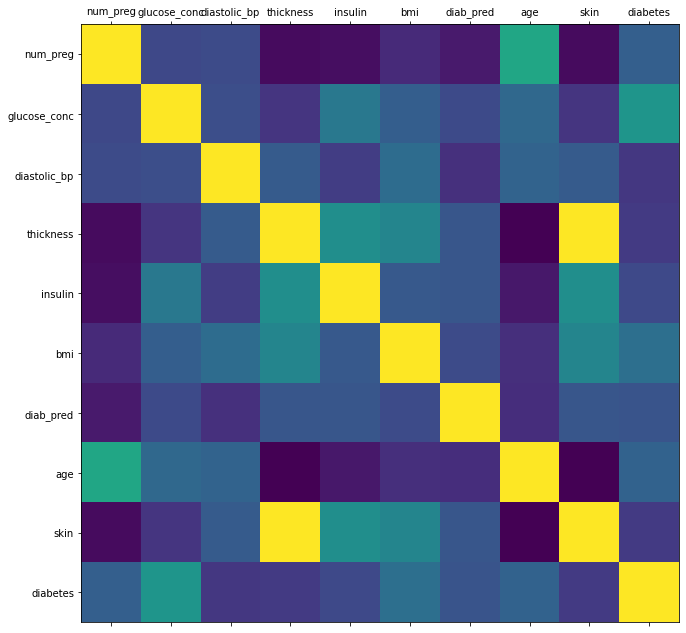

In [19]:
plot_corr(df)

In [22]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


<b> deleting skin feature beecuase its correlats to thickness 1:1.
    skin in the conversion of thickness mm to inches </b>

In [23]:
del df['skin']

In [24]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


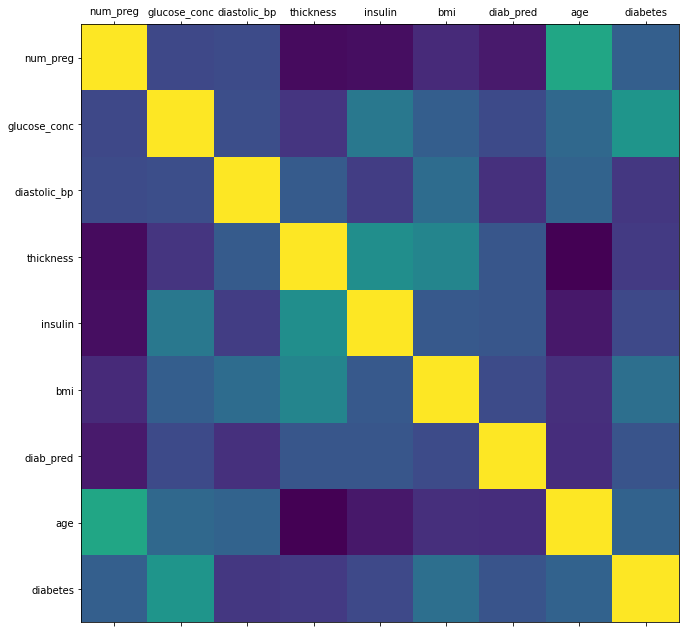

In [25]:
plot_corr(df)

### Check Data

In [27]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


<B>Change True to 1, False to 0</B>

In [28]:
diabetes_map = {True: 1, False: 0}

In [29]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [30]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check true/false ratio

In [34]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print ("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true / (num_true + num_false)) * 100))
print ("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false / (num_true + num_false)) * 100))
       

Number of True cases: 268 (34.90%)
Number of False cases: 500 (65.10%)


## 3. Choosing Algrithem

There are a lots of algorithem available.
the easyest way to choose the algorithem is by eliminat the algorithems by the following factors:
1. Learning = Supervised / Unsupervised (our case Supervised)
2. Result = Regression / classification (our case Binary classificaion)
3. Complexity = simple / ensamble (our case simple algorithem)
4. Basic vs enhanced = basic / enhance algorithem to undestand (our case because we are beginners we will choose basic)

### Candidate Algorithems

1. Naive Bayes - 
    Base on likelihood and probability for example how ofter the guy that has  high blood presure has diabetes.
    every feature has the same weight.
    requires smaller amount of data.
2. Logistic Regression
    return binary reslut.
    mesure the Relationship of each features and weights them base on there impact on the result.
3. Decision Tree
    The algorithem use binary tree to make decision.
    each node contains decision base upon the valuse of the feature.
    Requires enough data determine nodes and splits.
    has the advantage of having tools that help produce a picture of the tree.
    

<b> Selected algorithem is Naive Bayes </b> 
    1. simple - easy to understand.
    2. fast - up to 100 times faster.
    3. stable to data changes.

## 4. Traning the model

<b>Machine Learning Traning defintion:
    Letting specific data teach a machine learning algorithem to create a spacific prediction model</b>

### 1. Spliting the data
<b> 70% training, 30% for testing

In [42]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp' , 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

x = df[feature_col_names].values   # predictor feature columns (8 x m)
y = df[predicted_class_names].values  # predicted class (1=true, 0=false) column (1 x m)
split_test_size = 0.30  # 30% of the data will be for testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)  # test_size = 0.30 is 30%, 42 is the answer to everthing

In [44]:
print("{0:0.2f}% in training set".format((len(x_train) / len(df.index)) * 100))
print("{0:0.2f}% in training set".format((len(x_test) / len(df.index)) * 100))

69.92% in training set
30.08% in training set


### 2. verifying predicted value was split correctly

In [60]:
print("original True   :  {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df[df['diabetes'] == 1])/len(df)) * 100))
print("original False   :  {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df[df['diabetes'] == 0])/len(df)) * 100))

print("")
print("Training True   :  {0} ({1:0.2f}%)".format(len(y_train[y_train == 1]), (len(y_train[y_train == 1])/len(y_train)) * 100))
print("Training False   :  {0} ({1:0.2f}%)".format(len(y_train[y_train == 0]), (len(y_train[y_train == 0])/len(y_train)) * 100))

print("")
print("Test True   :  {0} ({1:0.2f}%)".format(len(y_test[y_test == 1]), (len(y_test[y_test == 1])/len(y_test)) * 100))
print("Test False   :  {0} ({1:0.2f}%)".format(len(y_test[y_test == 0]), (len(y_test[y_test == 0])/len(y_test)) * 100))

original True   :  268 (34.90%)
original False   :  500 (65.10%)

Training True   :  188 (35.01%)
Training False   :  349 (64.99%)

Test True   :  80 (34.63%)
Test False   :  151 (65.37%)


<b>Conclusion: the percentage of the row with diabetes equal 1 and the percentage of rows with diabetes equal 0 was preseved after we did the splitting,
    there for we the spliiting done correctly</b>

### 3. Post-spilting Data preparation

<B>Hidden Missing Values</B>

In [61]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Are these 0 values possible?


How many rows have unexpected 0 values?

In [63]:
print("# rows in dataframs {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df[df['age'] == 0])))

# rows in dataframs 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


after exploring the enternet we found out that the only one feature can hold 0 insulin and even that is not correct

### 4. imputing with mean

In [68]:
from sklearn.impute  import SimpleImputer 

# Impute with mean all 0 reading
fill_0 = SimpleImputer(missing_values=0, strategy="mean")

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

### 5. Training Initial Algorithem - Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data

nb_model = GaussianNB()
nb_model.fit(x_train, y_train.ravel())

GaussianNB()

## 5. Evaluating the Model

### 1. Performance on training data

In [78]:
# predict values using the training data
nb_predict_train = nb_model.predict(x_train)

from sklearn import metrics

# training matrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.7542


### 2. Performance on testing data

In [79]:
# predict values using the training data
nb_predict_test = nb_model.predict(x_test)

from sklearn import metrics

# training matrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.7359


#### metrics

In [84]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[118  33]
 [ 28  52]]

Classification report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



Confusion Matrix result explained:

True Negative - actual not diabetes and predicted to not be diabetes.
False Possitive - actual not diabetes but predicted to be diabetes.
True Possitive - actual diabetes and predicated to be diabetes.
False Negative - actual diabetes but predicted to be diabetes. 

| Negative | Possitive |
|--------------|---------|
| True Negative 118  |  False Possitive  33  |
| False Negative 28  |  True Possitive 52  | 


Classification report result explained:
generate a report based on the values shown in the confusion matrix.
recall is also known as the TP rate and sensitivity it is how well the model predicting diabetes when the result is actual diabetes. ( Recall = TP / (TP+FN) )

precision alson know as a positive prediction value this is how often the patien has diabetes when the model said they would. ( precision = TP/(TP+FP) )


<b>Conclusion: according the the classification report the result are not as good as we need them to be</b>


the recall and the precision of the True (1) need to be above equal 0.7


### 3. preformance improvment

<b>options:</b>

1. Try adjust the currect algorithem - 
    often, algorithem has spacial params call hyper parameters that helps to tune the algorithem performance.
    Naive Bayes has no such params.
    
2. Get mote date or improving the data

3. improve traning.

4. switch algorithem.

### a. Random Forest

Definition:
    Random forest is an ensumble algorithem and it based on decision trees.
    it creates multiple tress (hence the name) with randome subsets of the traning data.
    the result of this tree is average that usely results to improve performance and can reduce the algorithem tendencies to overfit.

In [88]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)  # create random forect object
rf_model.fit(x_train, y_train.ravel())

RandomForestClassifier(random_state=42)

#### Predict Training Data

In [93]:
rf_predict_train = rf_model.predict(x_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))


Accuracy: 1.0000


#### predict Test Data

In [94]:
rf_predict_test = rf_model.predict(x_test)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))


Accuracy: 0.7403


In [97]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")

print("Classification report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion Matrix
[[119  32]
 [ 28  52]]

Classification report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



<b>Conclusion: Random Forect is overfitting our data.</b>
over fitting is when an algorithem is learning the training data to good,
and as a result will work very well on the training data (in my case 100% accuracy)
and will work very poor on the tested data (74%).
    
how to fix over fitting:
    1. using hyperparameter fixing overfitting commonly called Regularization hyperparameter.
    it allows the developer to control how much the algorithem will focues on precisely fitting every corner case of the training data.
    
    2. cross validation using multiple subset of the training data during training process.
    
<b>Bias - variance trad-off.</b>
<b>Conclusion: we need to secrifice some perfection for better overall performance.<b>

### b. Logistice Regression

In [109]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42, solver='lbfgs', max_iter=150)
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")

print("Classification report")
print(metrics.classification_report(y_test, lr_predict_test))

Confusion Matrix
[[123  28]
 [ 33  47]]

Classification report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



Setting regularization parameter

C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

lst max value of 0.600 occured at C=0.100


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Text(0, 0.5, 'recall score')

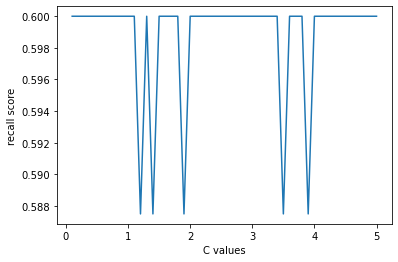

In [121]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []
C_val = C_start
best_recall_score = 0

while(C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("lst max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C values")
plt.ylabel("recall score")

C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

lst max value of 0.713 occured at C=0.200


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Text(0, 0.5, 'recall score')

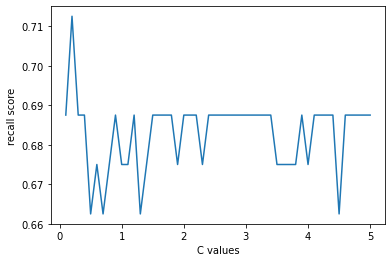

In [116]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []
C_val = C_start
best_recall_score = 0

while(C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, class_weight="balanced")
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("lst max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C values")
plt.ylabel("recall score")

### Cross validation

definition:
    kfold cross validation is a tecnicqe to validat out data.
    steps:
        1. split our traning data in to 10 training sets.
        2. use 9 of the training set to train the the model and then use the 1 that left to validate the data.
        3. we need to step 2 on all the other 9 sets.
        
Tuning Hyperparameter with cross validation
foreach fold
    determine best hhyperparameter
next
set model hyperparameter value to average best
    

### LogisticRegressionCV

In [118]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")
lr_cv_model.fit(x_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, n_jobs=-1,
                     random_state=42, refit=False)

In [120]:
lr_cv_predict_test = lr_cv_model.predict(x_test)


print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_cv_predict_test)))
print("")

print("Classification report")
print(metrics.classification_report(y_test, lr_cv_predict_test))


Confusion Matrix
[[111  40]
 [ 25  55]]

Classification report
              precision    recall  f1-score   support

           0       0.82      0.74      0.77       151
           1       0.58      0.69      0.63        80

    accuracy                           0.72       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.73      0.72      0.72       231

